# **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

first we need to understand our data

let's take a look our dataset

In [2]:
df = pd.read_csv('../data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Dataset Details**

This dataset has 768 rows and 9 columns. the columns include Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

**Description Columns Dataset**

* Pregnancies: To express the Number of pregnancies
* Glucose: To express the Glucose level in blood
* BloodPressure: To express the Blood pressure measurement
* SkinThickness: To express the thickness of the skin
* Insulin: To express the Insulin level in blood
* BMI: To express the Body mass index
* DiabetesPedigreeFunction: To express the Diabetes percentage
* Age: To express the age
* Outcome: To express the final result 1 is Yes and 0 is No

# **Preprocessing And Data Cleaning**

Handling NaN value

let's check for null values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks like we don't have null value. Great!

How about duplicated values?

In [8]:
df.duplicated().sum()

0

Wow, we don't have duplicated values either. that's Good!

next we will check for zero values in our dataset

we want to check if there are zero values in some columns that should not have zero, such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI.


In [9]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
(df[columns_to_check] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
BMI               11
dtype: int64

it turns out that we have zero values that the columns should not have

In [10]:
df[(df[columns_to_check] == 0).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


fills the zero value with the mean

In [11]:
columns_with_zeros = columns_to_check.copy()
for column in columns_with_zeros:
    df[column].replace(0, df[column].mean(), inplace=True)

/var/folders/vc/b9vwsv0n3fgchjl0lvbcyn5m0000gn/T/ipykernel_89368/905110474.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0, df[column].mean(), inplace=True)


In [12]:
(df[columns_to_check] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
dtype: int64

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


create a new category column to group ages

In [14]:
df_prepare = df.copy()

In [15]:
# Tentukan rentang usia
bins = [0, 20, 35, 50, 100]
labels_age = ['Teen', 'Young adult', 'Adult', 'Senior']

#Buat kolom baru untuk kelompok usia
df_prepare['AgeGroup'] = pd.cut(df_prepare['Age'], bins=bins, labels=labels_age, right=False)

df_prepare.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.000000,35.000000,0,33.600000,0.627,50,1,Senior
1,1,85.0,66.000000,29.000000,0,26.600000,0.351,31,0,Young adult
2,8,183.0,64.000000,20.536458,0,23.300000,0.672,32,1,Young adult
3,1,89.0,66.000000,23.000000,94,28.100000,0.167,21,0,Young adult
4,0,137.0,40.000000,35.000000,168,43.100000,2.288,33,1,Young adult
5,5,116.0,74.000000,20.536458,0,25.600000,0.201,30,0,Young adult
6,3,78.0,50.000000,32.000000,88,31.000000,0.248,26,1,Young adult
7,10,115.0,69.105469,20.536458,0,35.300000,0.134,29,0,Young adult
8,2,197.0,70.000000,45.000000,543,30.500000,0.158,53,1,Senior
9,8,125.0,96.000000,20.536458,0,31.992578,0.232,54,1,Senior


we have grouped the data by age with the following conditions:

* Teen: 0-20 years old
* Young Adult: 21-35 years old
* Adult: 36-50 years old
* Senior: 51 years old and above

Checking For Outliers

Text(0, 0.5, 'Values')

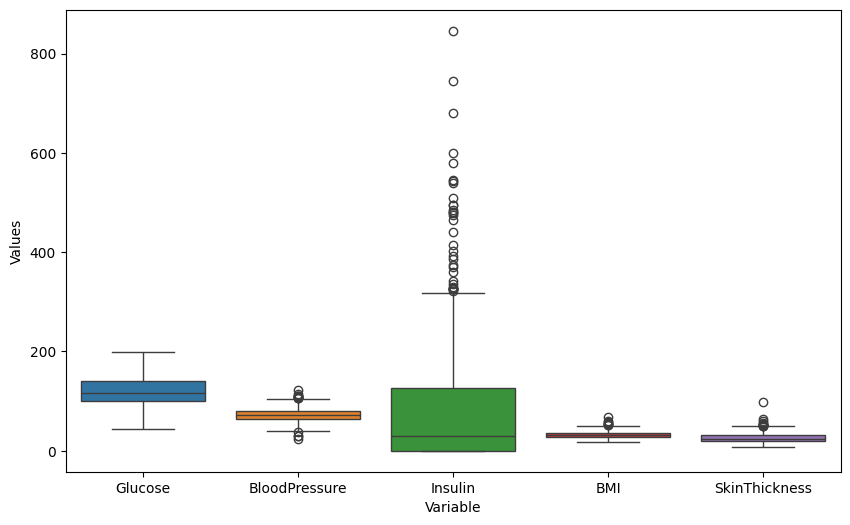

In [16]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=df_prepare[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']])
plt.xlabel('Variable')
plt.ylabel('Values')

Cleaning Outliers using IQR Method

In [17]:
def remove_outlier(df, cleaning_col):
    # Calculate Q1 and Q3 for each column
    Q1 = df_prepare[cleaning_col].quantile(0.25)
    Q3 = df_prepare[cleaning_col].quantile(0.75)
    IQR = Q3 - Q1

    # Removing outliers
    df_clean = df_prepare[~((df_prepare[cleaning_col] < (Q1 - 1.5 * IQR)) | (df_prepare[cleaning_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_clean

# Using the remove_outlier function
cleaning_col = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
df_clean = remove_outlier(df_prepare, cleaning_col)

# Checking the data size after removing outliers
print(df_clean.shape)


(705, 10)


In [18]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1,Senior
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0,Young adult
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1,Young adult
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0,Young adult
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1,Young adult


Text(0, 0.5, 'Values')

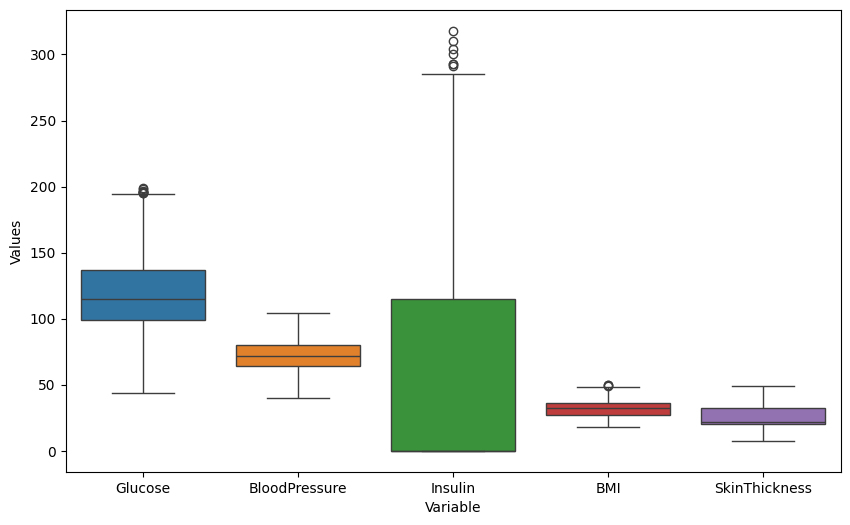

In [19]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=df_clean[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']])
plt.xlabel('Variable')
plt.ylabel('Values')

In [20]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1,Senior
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0,Young adult
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1,Young adult
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0,Young adult
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1,Young adult


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               705 non-null    int64   
 1   Glucose                   705 non-null    float64 
 2   BloodPressure             705 non-null    float64 
 3   SkinThickness             705 non-null    float64 
 4   Insulin                   705 non-null    int64   
 5   BMI                       705 non-null    float64 
 6   DiabetesPedigreeFunction  705 non-null    float64 
 7   Age                       705 non-null    int64   
 8   Outcome                   705 non-null    int64   
 9   AgeGroup                  705 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 56.0 KB


In [22]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,705.0,3.841135,3.344816,0.000,1.000000,3.000000,6.000,17.000
Glucose,705.0,119.799252,29.447652,44.000,99.000000,115.000000,137.000,199.000
BloodPressure,705.0,71.834874,10.885877,40.000,64.000000,72.000000,80.000,104.000
SkinThickness,705.0,25.755400,8.477723,7.000,20.536458,22.000000,32.000,49.000
Insulin,705.0,61.811348,78.939490,0.000,0.000000,0.000000,115.000,318.000
BMI,705.0,31.915345,6.340816,18.200,27.300000,31.992578,35.900,50.000
DiabetesPedigreeFunction,705.0,0.465058,0.316566,0.078,0.244000,0.366000,0.613,2.288
Age,705.0,33.141844,11.693154,21.000,24.000000,29.000000,40.000,81.000
Outcome,705.0,0.336170,0.472733,0.000,0.000000,0.000000,1.000,1.000


# **Exploratory Data Analysis**

What is the age distribution in this dataset, and is there a relationship between age group and outcome?

/var/folders/vc/b9vwsv0n3fgchjl0lvbcyn5m0000gn/T/ipykernel_89368/179792829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Age', data=average_age, palette='viridis')


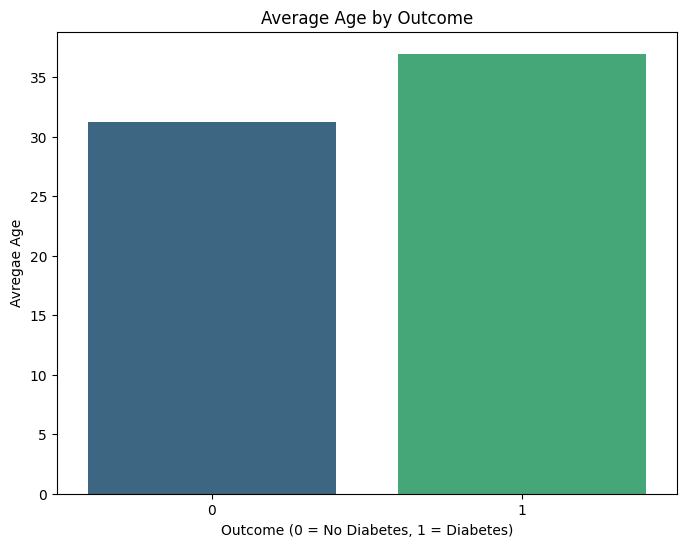

In [34]:
# Calculating average age by Outcome
average_age = df_clean.groupby('Outcome')['Age'].mean().reset_index()

# Visualization of average age by Outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Age', data=average_age, palette='viridis')
plt.title('Average Age by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Avregae Age')
plt.show()

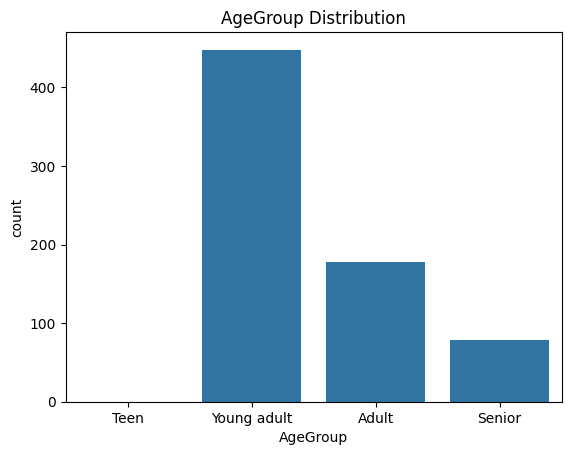

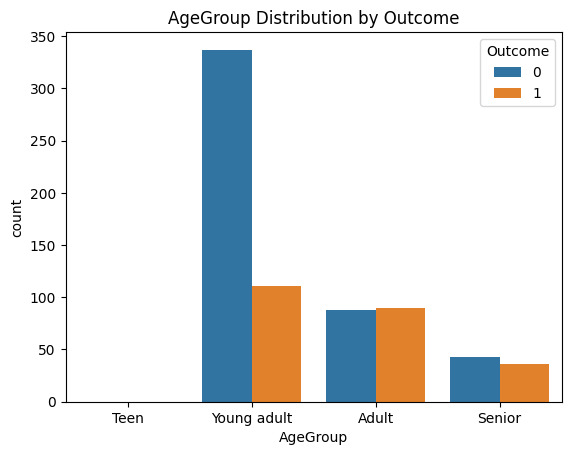

In [35]:
# AgeGroup Distribution
sns.countplot(x='AgeGroup', data=df_clean)
plt.title('AgeGroup Distribution')
plt.show()

# AgeGroup Distribution against Outcome
sns.countplot(x='AgeGroup', hue='Outcome', data=df_clean)
plt.title('AgeGroup Distribution by Outcome')
plt.show()

Is there a relationship between certain features such as Glucose, BMI, and Insulin to Outcome?

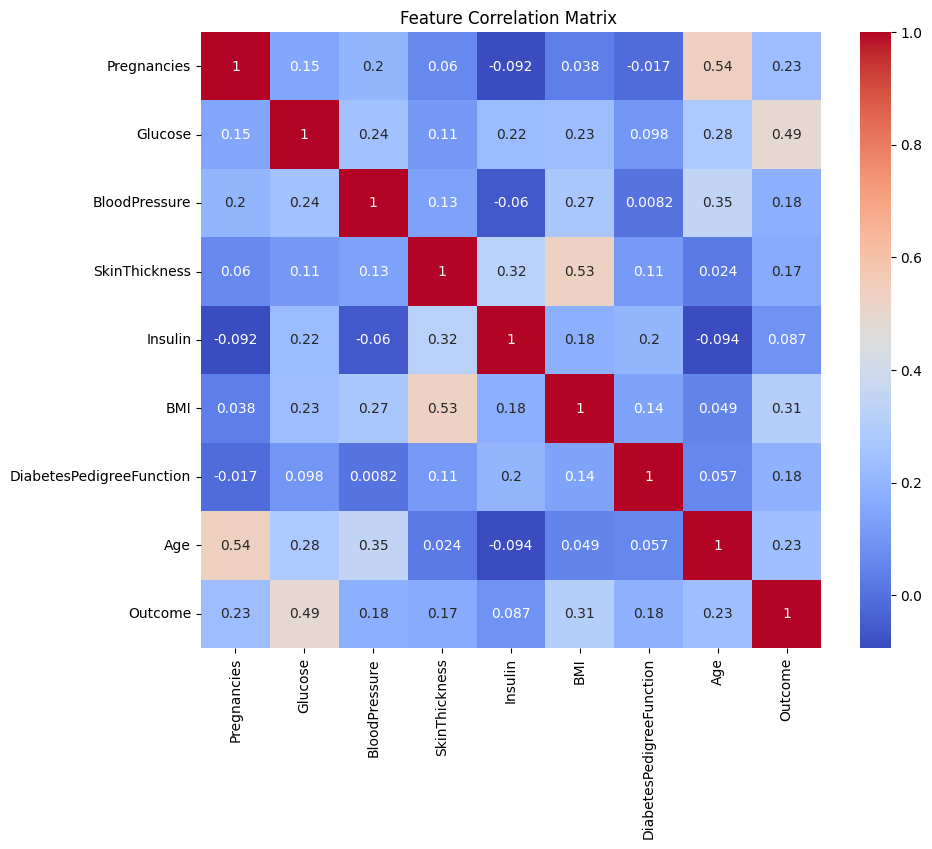

In [36]:
# Calculate correlation for numeric columns only (except AgeGroup)
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix
corr = df_clean[numeric_columns].corr()

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix ')
plt.show()


What is the distribution of glucose and insulin for patients who have diabetes and those who do not?

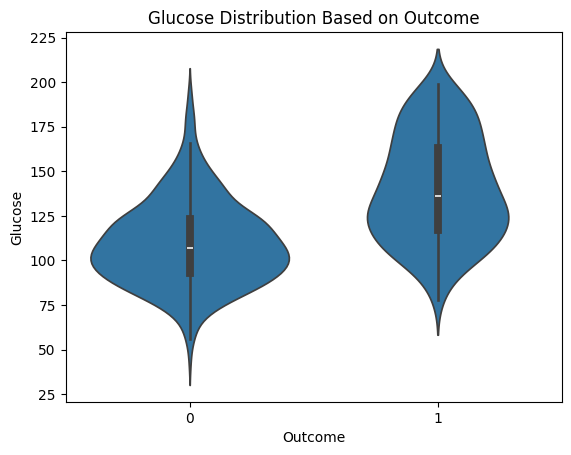

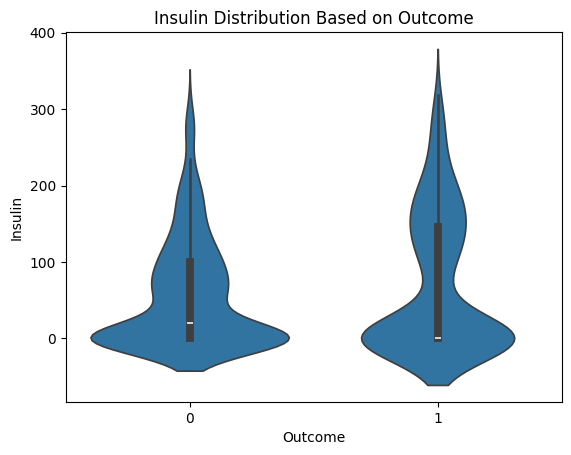

In [37]:
# Glucose Distribution by Outcome
sns.violinplot(x='Outcome', y='Glucose', data=df_clean)
plt.title('Glucose Distribution Based on Outcome')
plt.show()

# Distribusi Insulin berdasarkan Outcome
sns.violinplot(x='Outcome', y='Insulin', data=df_clean)
plt.title('Insulin Distribution Based on Outcome')
plt.show()


Is there an association between number of pregnancies and outcome?

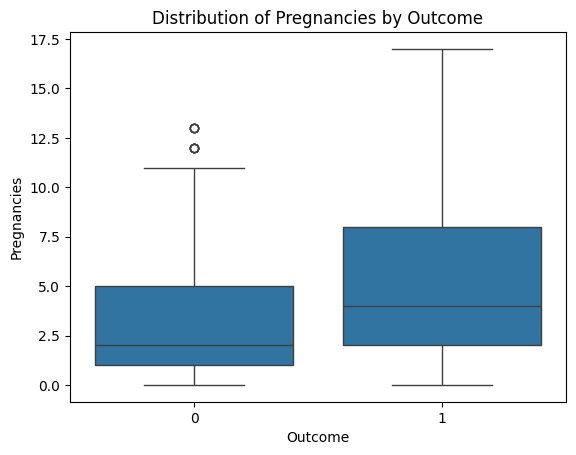

In [38]:
# Distribution of Pregnancies by Outcome
sns.boxplot(x='Outcome', y='Pregnancies', data=df_clean)
plt.title('Distribution of Pregnancies by Outcome')
plt.show()

Do patients with diabetes tend to have higher BMI values?

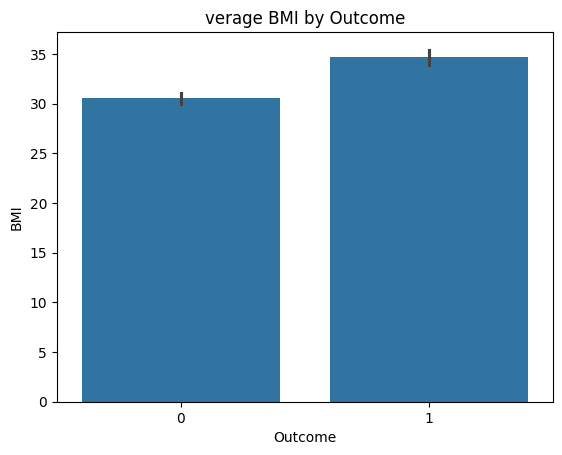

In [39]:
# Average BMI by Outcome
sns.barplot(x='Outcome', y='BMI', data=df_clean)
plt.title('verage BMI by Outcome')
plt.show()


## **Model Prepare**

we will not use AgeGroup column for our model

In [29]:
new_df = df_clean.copy()

In [30]:
new_df = new_df.drop(columns=['AgeGroup'])

In [31]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


In [32]:
new_df.to_csv('new_df.csv', index=False)